# NN for fashion_mnist dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset

fashion_mnist = keras.datasets.fashion_mnist  
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
       

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# DataProcessing

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Building Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])


# Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Training model

model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4969 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3118 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2798 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2655 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2455 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [6]:
# Evaluating or Testing model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8847
Test accuracy: 0.8847000002861023


In [7]:
# Making predictions

predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

Pick a number: 5


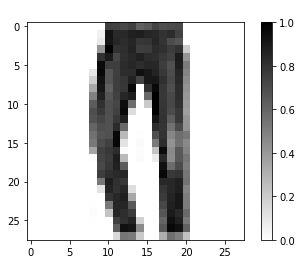

In [11]:
# Verifying the model

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)